DATASET: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

# BUSSINES UNDERSTANDING

In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [62]:
df = pd.read_csv('train.csv')

# DATA UNDERSTANDING

Deskripsi Tabe:

daya_baterai : Total energi yang dapat disimpan oleh baterai dalam satu waktu yang diukur dalam mAh

biru : Memiliki bluetooth atau tidak

clock_speed : kecepatan mikroprosesor dalam mengeksekusi instruksi

dual_sim : Memiliki dukungan dual sim atau tidak

fc : Mega piksel kamera depan

four_g : Memiliki 4G atau tidak

int_memory : Memori Internal dalam Gigabyte

m_dep : Kedalaman Ponsel dalam cm

mobile_wt : Berat ponsel

n_cores : Jumlah inti prosesor

pc : Mega piksel Kamera Utama

px_height : Tinggi Resolusi Piksel

px_width : Lebar Resolusi Piksel

ram : Memori Akses Acak dalam Mega Byte

sc_h : Tinggi Layar ponsel dalam cm

sc_w : Lebar Layar ponsel dalam cm

talk_time : waktu terlama satu kali pengisian daya baterai dapat bertahan saat Anda berada

three_g : Memiliki 3G atau tidak

touch_screen : Memiliki layar sentuh atau tidak

wifi : Memiliki wifi atau tidak

price_range : Ini adalah variabel target dengan nilai 0 (biaya rendah), 1 (biaya sedang), 2 (biaya tinggi) dan 3 (biaya sangat tinggi).

In [63]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [64]:
df.shape

(499, 21)

In [65]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [66]:
df['price_range'].value_counts()

3    140
2    124
1    122
0    113
Name: price_range, dtype: int64

# DATA PREPARATION

In [67]:
def is_binary(column):
    unique_values = column.unique()
    return set(unique_values).issubset([0, 1])

# Filter the DataFrame to select columns containing binary data
binary_columns = [col for col in df.columns if is_binary(df[col])]

# Display the binary columns
binary_df = df[binary_columns]
print(binary_df)

     blue  dual_sim  four_g  three_g  touch_screen  wifi
0       0         0       0        0             0     1
1       1         1       1        1             1     0
2       1         1       1        1             1     0
3       1         0       0        1             0     0
4       1         0       1        1             1     0
..    ...       ...     ...      ...           ...   ...
494     1         0       0        1             1     0
495     0         0       0        1             1     1
496     1         1       0        0             0     0
497     0         0       0        1             0     1
498     1         1       1        1             0     0

[499 rows x 6 columns]


In [68]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

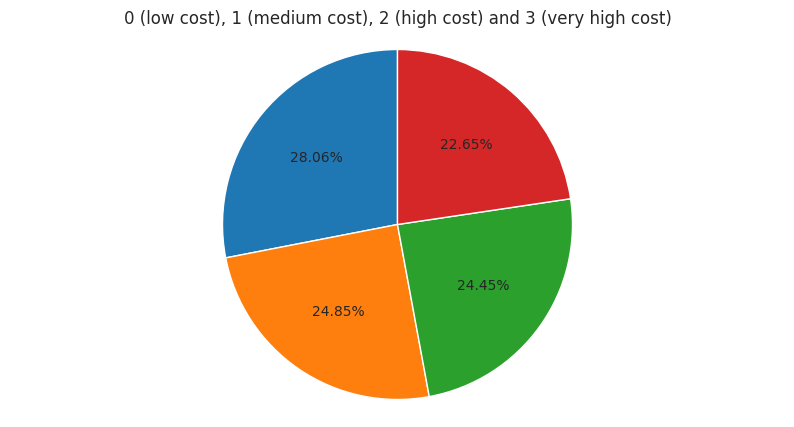

In [69]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.pie(df['price_range'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title ('0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost)')
plt.show()

# MODELLING

In [70]:
# memisahkan data dan label
X = df.drop (columns='price_range', axis=1)
Y = df['price_range']

In [71]:
print(X)

     battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0              842     0          2.2         0   1       0           7   
1             1021     1          0.5         1   0       1          53   
2              563     1          0.5         1   2       1          41   
3              615     1          2.5         0   0       0          10   
4             1821     1          1.2         0  13       1          44   
..             ...   ...          ...       ...  ..     ...         ...   
494           1225     1          2.4         0   0       0          15   
495           1066     0          1.6         0   5       0          39   
496           1554     1          0.5         1  11       0           5   
497           1337     0          0.5         0  13       0          31   
498           1926     1          1.7         1   1       1          33   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.6        188 

In [72]:
print(Y)

0      1
1      2
2      2
3      2
4      1
      ..
494    1
495    2
496    3
497    1
498    2
Name: price_range, Length: 499, dtype: int64


3. Standarisasi Data

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(X)

StandardScaler()

In [75]:
standarized_data = scaler.transform(X)

In [76]:
print(standarized_data)

[[-0.96204782 -0.95109419  0.77126905 ... -1.80691927 -1.05990766
   0.98606897]
 [-0.55027572  1.05142058 -1.32574228 ...  0.55342815  0.94347841
  -1.01412784]
 [-1.6038602   1.05142058 -1.32574228 ...  0.55342815  0.94347841
  -1.01412784]
 ...
 [ 0.67583898  1.05142058 -1.32574228 ... -1.80691927 -1.05990766
  -1.01412784]
 [ 0.17665157 -0.95109419 -1.32574228 ...  0.55342815 -1.05990766
   0.98606897]
 [ 1.53158883  1.05142058  0.15450101 ...  0.55342815 -1.05990766
  -1.01412784]]


In [77]:
X = standarized_data
Y = df['price_range']

In [78]:
print(X)
print(Y)

[[-0.96204782 -0.95109419  0.77126905 ... -1.80691927 -1.05990766
   0.98606897]
 [-0.55027572  1.05142058 -1.32574228 ...  0.55342815  0.94347841
  -1.01412784]
 [-1.6038602   1.05142058 -1.32574228 ...  0.55342815  0.94347841
  -1.01412784]
 ...
 [ 0.67583898  1.05142058 -1.32574228 ... -1.80691927 -1.05990766
  -1.01412784]
 [ 0.17665157 -0.95109419 -1.32574228 ...  0.55342815 -1.05990766
   0.98606897]
 [ 1.53158883  1.05142058  0.15450101 ...  0.55342815 -1.05990766
  -1.01412784]]
0      1
1      2
2      2
3      2
4      1
      ..
494    1
495    2
496    3
497    1
498    2
Name: price_range, Length: 499, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [80]:
print(X.shape, X_train.shape, X_test.shape)

(499, 20) (399, 20) (100, 20)


5. Membuat data latih menggunakan algoritma SVM

In [81]:
classifier = svm.SVC(kernel='linear')

In [82]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [83]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [84]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.9699248120300752


In [85]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [86]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.92


# EVALUATION

7. Membuat Model Prediksi

In [87]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [88]:
input_data = (842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1)
# input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print()
print(prediction)
if (prediction[0] == 3):
    print('Harga HP Terlalu Mahal')
elif (prediction[0] == 2):
    print('Harga HP Cukup Mahal')
elif (prediction[0] == 1):
    print('Harga HP Normal/Sesuai Standar')
else :
    print('Harga HP Murah')

[[-0.96204782 -0.95109419  0.77126905 -1.04720516 -0.75230063 -1.06847129
  -1.46342996  0.30380404  1.26577536 -1.11729611 -1.32044842 -1.43600466
  -1.15682036  0.32776186 -0.81293804  0.26368866  1.49325894 -1.80691927
  -1.05990766  0.98606897]]

[1]
Harga HP Normal/Sesuai Standar


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8. simpan model

In [89]:
import pickle

In [90]:
filename = 'hp_model.sav'
pickle.dump(classifier, open(filename,'wb'))
pickle.dump(scaler, open('scaler.sav','wb'))